<a href="https://colab.research.google.com/github/UttaraKet1607/Traffic-Sign-Recognition-/blob/main/Traffic_Sign_Recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Signs Recognition 

### 1) Downloading the [dataset](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)

Intro

1.   Multi-class classification problem
2.   More than 40 classes
3.   More than 50,000 images in total
4.   Large, lifelike database

Downloading the dataset from kaggle [directly](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/) into Google Colab.

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 608M/612M [00:03<00:00, 186MB/s]
100% 612M/612M [00:03<00:00, 170MB/s]


In [ ]:
! unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/2/00002_00045_00017.png  
  inflating: train/2/00002_00045_00018.png  
  inflating: train/2/00002_00045_00019.png  
  inflating: train/2/00002_00045_00020.png  
  inflating: train/2/00002_00045_00021.png  
  inflating: train/2/00002_00045_00022.png  
  inflating: train/2/00002_00045_00023.png  
  inflating: train/2/00002_00045_00024.png  
  inflating: train/2/00002_00045_00025.png  
  inflating: train/2/00002_00045_00026.png  
  inflating: train/2/00002_00045_00027.png  
  inflating: train/2/00002_00045_00028.png  
  inflating: train/2/00002_00045_00029.png  
  inflating: train/2/00002_00046_00000.png  
  inflating: train/2/00002_00046_00001.png  
  inflating: train/2/00002_00046_00002.png  
  inflating: train/2/00002_00046_00003.png  
  inflating: train/2/00002_00046_00004.png  
  inflating: train/2/00002_00046_00005.png  
  inflating: train/2/00002_00046_00006.png  
  inflating: train/2/00002_00046_00007.png  
  in

### 2) Understanding the data and preprocessing 

CLASS LABELS SCREENSHOT ADDED FOR REFERENCE BELOW

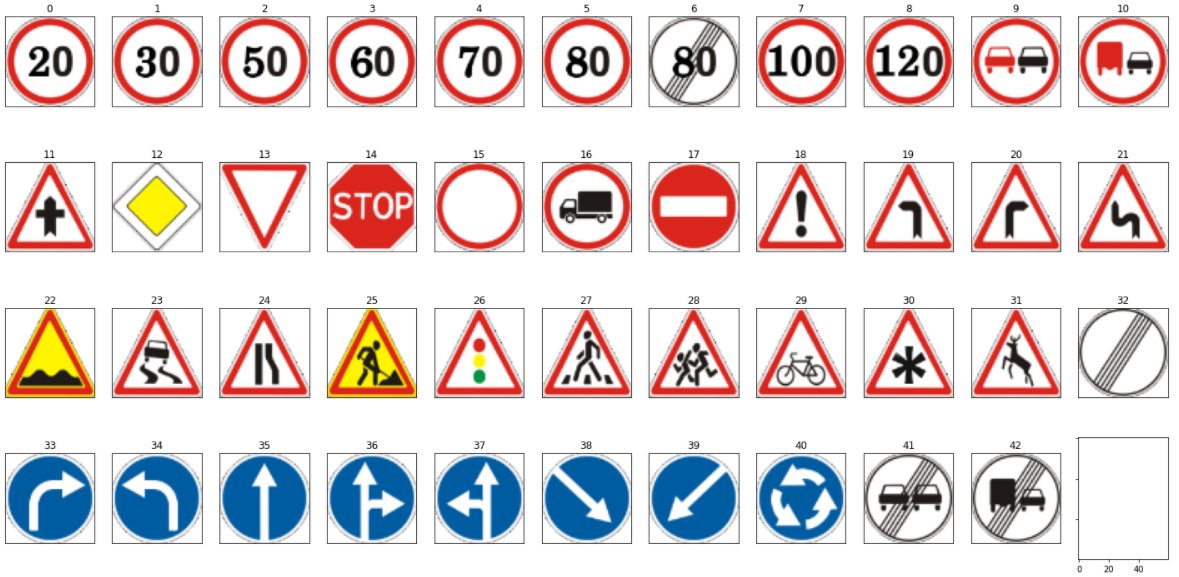

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
imgs_path = "./Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((30,30))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)

In [ ]:
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")
print(data.shape)

Done
(39209, 30, 30, 3)


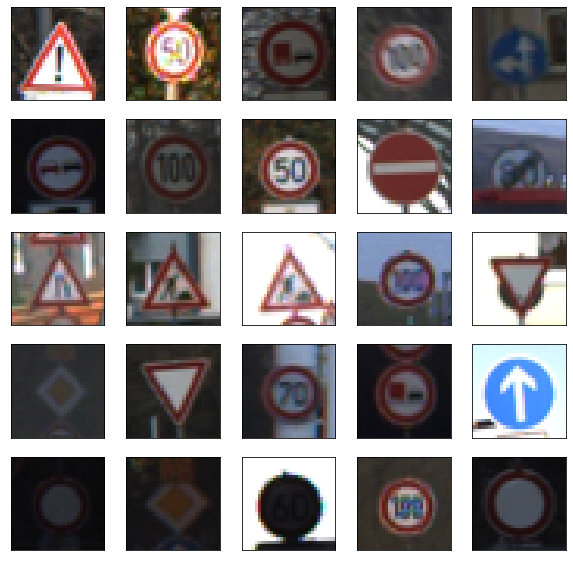

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[np.random.randint(39209)], cmap=plt.cm.binary)
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


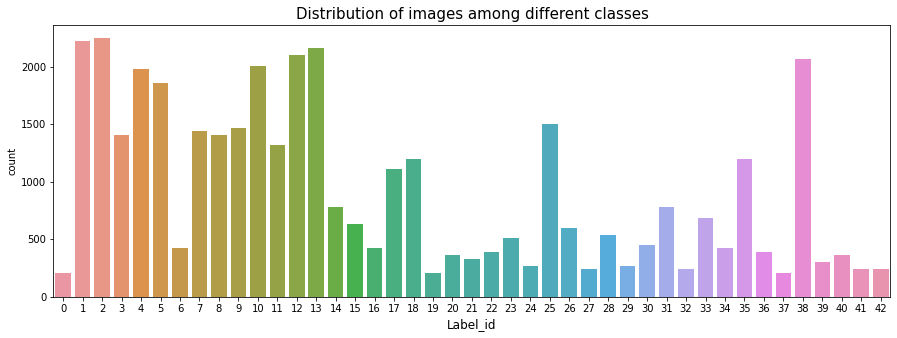

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(labels)
plt.title('Distribution of images among different classes', fontsize = 15)
plt.xlabel('Label_id', fontsize=12)
plt.show()

### 3) Label Encoding

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


### 4) Building a CNN model

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/15
981/981 [==============================] - 140s 142ms/step - loss: 1.9093 - accuracy: 0.4972 - val_loss: 0.4953 - val_accuracy: 0.8586
Epoch 2/15
981/981 [==============================] - 139s 141ms/step - loss: 0.5831 - accuracy: 0.8269 - val_loss: 0.1806 - val_accuracy: 0.9522
Epoch 3/15
981/981 [==============================] - 140s 143ms/step - loss: 0.3723 - accuracy: 0.8926 - val_loss: 0.1225 - val_accuracy: 0.9712
Epoch 4/15
981/981 [==============================] - 141s 144ms/step - loss: 0.3032 - accuracy: 0.9136 - val_loss: 0.0738 - val_accuracy: 0.9834
Epoch 5/15
981/981 [==============================] - 141s 143ms/step - loss: 0.2609 - accuracy: 0.9272 - val_loss: 0.1531 - val_accuracy: 0.9609
Epoch 6/15
981/981 [==============================] - 140s 143ms/step - loss: 0.2458 - accuracy: 0.9321 - val_loss: 0.0632 - val_accuracy: 0.9844
Epoch 7/15
981/981 [==============================] - 140s 143ms/step - loss: 0.2518 - accuracy: 0.9336 - val_loss: 0.0655 -

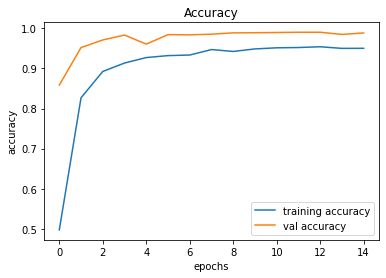

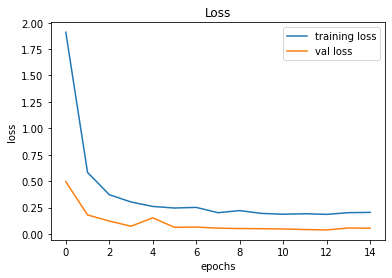

In [ ]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### 5) Making predictions on unseen data

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test_data = pd.read_csv('Test.csv')

labels = y_test_data["ClassId"].values
imgs = y_test_data["Path"].values

data_test=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data_test.append(np.array(image))

X_test_data=np.array(data_test)

pred=model.predict(X_test_data) 
classes_x=np.argmax(pred,axis=1)


#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x))

model.save("traffic_cnn_classifier")

0.9640538400633413
INFO:tensorflow:Assets written to: traffic_cnn_classifier/assets


CLASS LABELS SCREENSHOT ADDED FOR REFERENCE BELOW

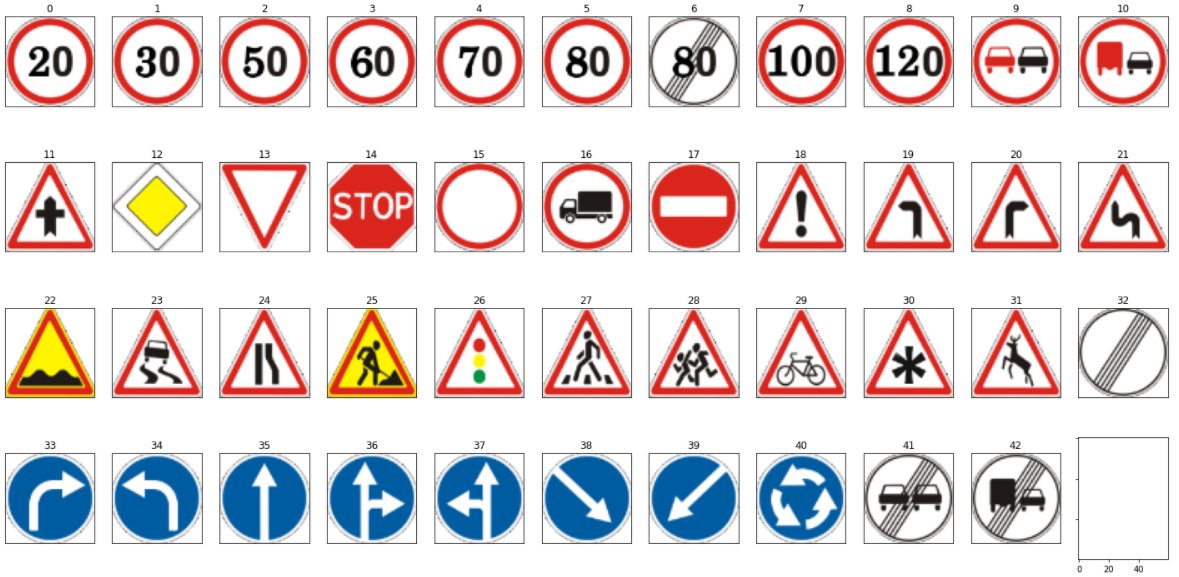

38


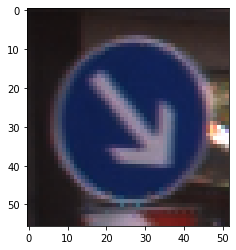

In [ ]:
image1= Image.open(imgs[5])
plt.imshow(image1)
print(classes_x[5])

1


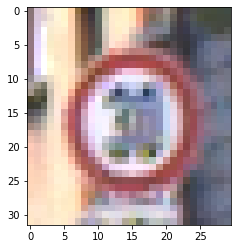

In [ ]:
image2= Image.open(imgs[100])
plt.imshow(image2)
print(classes_x[100])

7


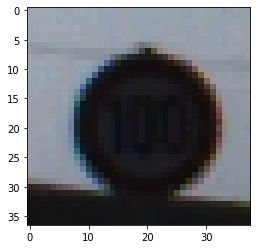

In [ ]:
image2= Image.open(imgs[2340])
plt.imshow(image2)
print(classes_x[2340])